In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Session 03b

## Implementation of Perceptron with Sigmoid

<img src='../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>


## 1. Import Statements
Import all the libraries needed.

In [2]:
###-----------------
### Import Libraries
###-----------------

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
%matplotlib inline

## 2. Setup Global Parameters

In [3]:
###----------------
### Some parameters
###----------------

inpDir = '../input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 2000  # number of epochs

ALPHA = 0.1  # learning rate

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'brg'

plt.rcParams.update(params)

## Generate Data Set
<div style="font-family: Arial; font-size:1.1em;color:black;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [4]:
X, y = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0]))

## 4. Visualization
<p style="font-family: Arial; font-size:1.2em;color:black;">
DataFrames are easier to visualize
</p>

In [5]:
# Create daframe from X and y matrices
data_df = pd.DataFrame(X, columns = ['A', 'B']) 

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [6]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [7]:
# what labels are present?
data_df.target.unique()

array([0, 1])

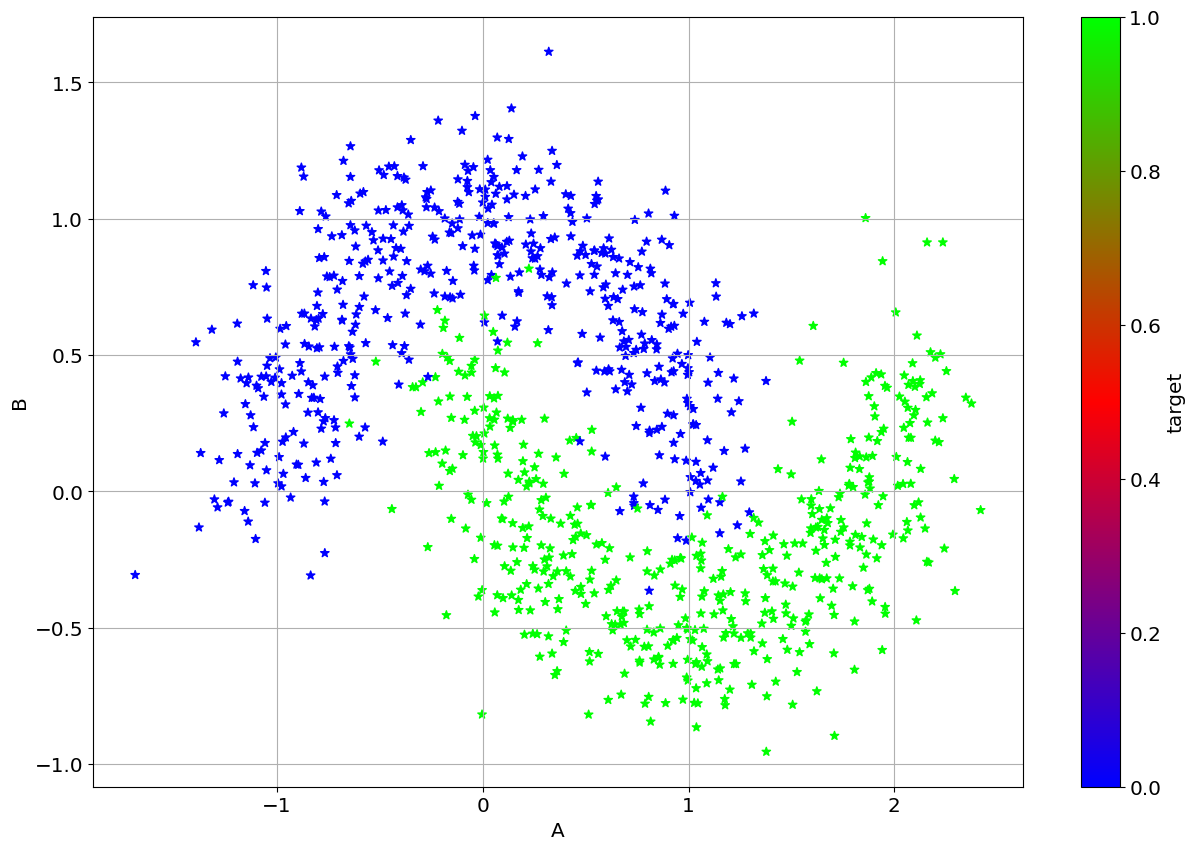

In [8]:
data_df.plot.scatter('A', 'B', 
                     s=40,
                     marker = '*', 
                     c = 'target',
                     cmap=CMAP);

#### In case you want to plot X Array directly uncomment following lines
# Plot the data
#plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=plt.cm.bwr)

plt.grid()

<p style="font-family: Arial; font-size:1.2em;color:black;">
    We will keep 10%, i.e. 100 records for testing and remaining records will be used in training.
</p>

In [9]:
# Splitting in train and test dataset. Type will be numpy array

data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

print (data_train.shape, data_test.shape)

print (type(data_train), type(data_test))

(900, 3) (100, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Over to Perceptron

<div class="alert alert-block alert-info" style="font-family: Arial; font-size:1.1em;">

Our output is binary. To keep the code in line with what we discussed in previous lecture, we will simply output 1 for positive values of 'z' and zero for negative values.
</div>
<img src="images/dnn_nb_s03_fig1.png" width='350' align = 'left' alt = 'dnn_nb_s03_fig1'>


$$
\begin{aligned}
z & = x_1 . w_1 + x_2 . w_2 + b_1 \\
\mathrm{or}\\
z & = X . W + b_1 \\
\end{aligned}
$$
<br/>

$$
\begin{equation*}
\hat{y} =  \begin{vmatrix}
1.0 for z>=0  \\
0.0 for z<0\\
\end{vmatrix}
\end{equation*}
$$

In [10]:
def fn_sigmoid(z : np.ndarray) -> float:
    '''
    Args:
        z : a matrix of z values of shape (m, n_output)
    returns:
        sigmoid values of z
    
    '''
    
    return 1 / ( 1 + np.exp ( -z ) )


In [11]:
sm = fn_sigmoid(np.asarray([-1, 0., 1.]))
print (sm)

[0.26894142 0.5        0.73105858]


In [12]:
# A function to make predictions
def fn_predict(row, weights):
    '''
    Args: 
        row: one data row.
        weights: array with first value as b and then w1 and w2.
    return:
        0 if sum is negative else 1. Simplest form of activation function.
    '''
    
    # building up z = X * W + b
    z = weights[0] # Initialize with b, bias
    
    for i in range(len(row)-1):
        
        z += weights[i + 1] * row[i] # and weights are added here to the values

    return fn_sigmoid(z)

**Its advisable to test the function**

In [13]:
#Unit test
weights = [0.1, 2.0, 1.0]

display(data_df.loc[0])

fn_predict(data_df.loc[0].values, weights)

A         0.906340
B         0.902676
target    0.000000
Name: 0, dtype: float64

0.9434999754763397

<div class="alert alert-block alert-info" style="font-family: Arial; font-size:1.1em;">
    
<p>
As we know that adjustments in the weights $\partial{z}$ are simply (a-$\hat{y}$). Hence we will be adjusting weights by learning_rate * (a-$\hat{y}$). 
</p>
<p>
    <strong>Note:</strong> Take learning_rate ($\alpha$) as some constant and we will circle back to learning_rate after some sessions.
</p>
    <h3>Estimate Perceptron weights Back-propagation</h3>
    $
\begin{aligned}
\partial{z}  & = a - y \\
\partial{b}  & = \partial{z} \\
\partial{w_1}  & = x_1 \circ \partial{z}\\
\partial{w_2}  & = x_2 \circ \partial{z}\\
\end{aligned}
$
    <hr>
      $
\begin{aligned}
b & = b -  \frac{1}{m} (\alpha \circ \partial{b}) \\
w_1  & = w_1 - \frac{1}{m}(\alpha \circ \partial{w_1} )\\
w_2  & = w_2 - \frac{1}{m}(\alpha \circ \partial{w_2} )\\
\end{aligned}
$
    </div>

In [14]:
def train_weights(train, alpha, n_epoch):
    '''
    Args: 
        train: training dataset
        alpha: learning rate
        n_epoch: number of epoch to train
    return:
        errors: list containing errors
        weights: list of updated weights
    '''
    
    # We will be appending errors in a list
    errors = []
    
    #Initialize Weights. In theory b can be zero. For sake of simplicity lets initialize b as well.         
    weights = np.random.rand(train.shape[1])
    
    # find m; number of samples
    m = train.shape[0]
    
    for epoch in range(n_epoch): # loop for number of epochs
        
        sum_error = 0.0
        
        ###---------------------------------------------------
        ### Note: we are adjusting weights in each of the row.
        ### It is one of the techniques of optimization
        ###---------------------------------------------------
        for row in train:
            
            ####------------------------
            #### Changes for sigmoid function
            ####------------------------
            a = fn_predict(row, weights) # calculate activation 
                
            error = -row[-1] * np.log(a) # cross entropy
            
            dz = a - row[-1]  # a-y
            ####-----------------------------
            
            
            sum_error += error
            
            # In stochastic gradient descend we need to devide by m
            # so that individual example adjusts in proportion to overall examples
            
            weights[0] = weights[0] - alpha * dz / m  # update b
            
            for i in range(len(row)-1):
                
                weights[i + 1] = weights[i + 1] - alpha * dz * row[i] / m # update rest of the weights
        
        errors.append(sum_error / m)
        
    return errors, weights

In [15]:
# Get value for learning rate and number of epochs
alpha = ALPHA

n_epoch = EPOCHS

errors, weights = train_weights(data_train, alpha, n_epoch)

print(weights)

[ 0.44890765  1.17800504 -4.35604791]


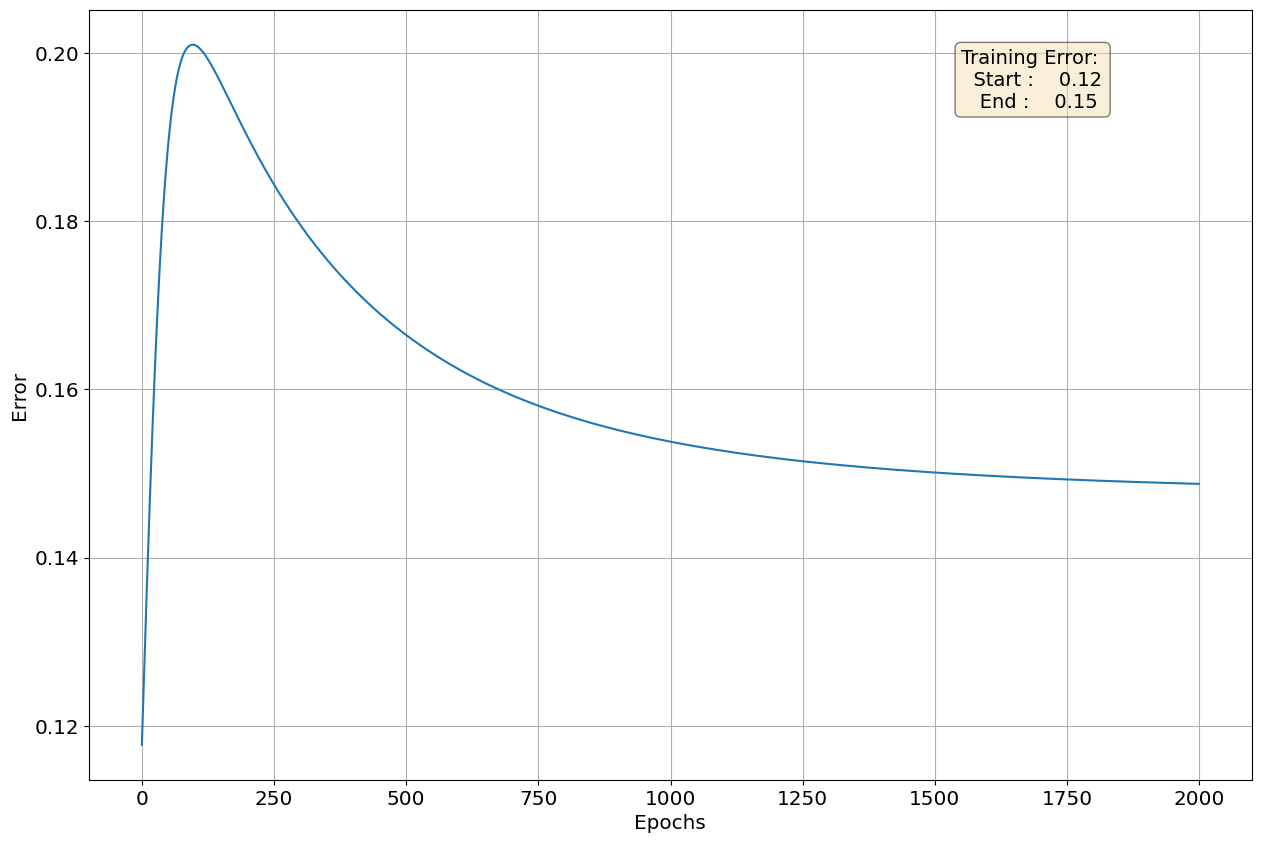

In [16]:
fig, ax = plt.subplots()
ax.plot(errors);

# little beautification
txtstr = "Training Error: \n  Start : {:7.2f}\n   End : {:7.2f}".format(errors[0],errors[-1]) #text to plot

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper right in axes coords
ax.text(0.75, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")

ax.set_ylabel("Error")

ax.grid();

In [17]:
predictions = []

for row in data_train:
    
    a = fn_predict(row, weights)
    
    prediction = 0
    
    if a >= 0.5: prediction = 1 # argmax

    predictions.append(prediction)

In [18]:
accuracy_score(data_train[:,-1], predictions)

0.8655555555555555

### Lets make some predictions as well

In [19]:
predictions = []

for row in data_test:
    
    a = fn_predict(row, weights)
    
    prediction = 0
    
    if a >= 0.5: prediction = 1 # argmax

    predictions.append(prediction)

In [20]:
accuracy_score(data_test[:,-1], predictions)

0.9

In [21]:
cm = confusion_matrix(data_test[:,-1], predictions)
cm

array([[55,  3],
       [ 7, 35]])

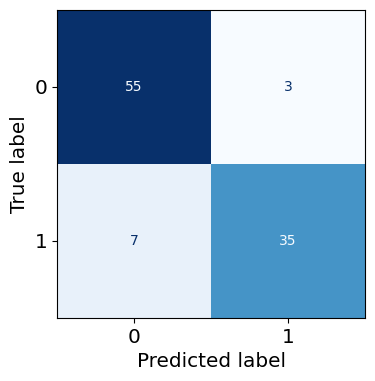

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', colorbar=False)

plt.show();

In [23]:
def fn_plot_decision_boundary(X_tr, X_ts, wts = weights):
    
    '''
    Args:
        X_tr :  Training dataset
        X_ts : Testing dataset
        wts : Weights
    '''
    
    fig, ax = plt.subplots();
    
    dm = 0.05
    
    x_min, x_max = X_tr[:, 0].min() - 0.5, X_tr[:, 0].max() + 0.5
    
    y_min, y_max = X_tr[:, 1].min() - 0.5, X_tr[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    XX = np.c_[xx.ravel(), yy.ravel()]

    XX = np.hstack( ( XX, np.ones((XX.shape[0],1)) ) )
    
    
    y_pred = []
    
    for row in (XX):

        ###-----------------------
        ### Changes due to Sigmoid
        ###-----------------------
        a = fn_predict(row, wts)
        
        y_p = 0
        
        if a >= 0.5 : y_p = 1
            
        y_pred.append(y_p)
        
    Z = np.array(y_pred).reshape(xx.shape)

    # Plotting contours for data as per testing
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Plotting scatter for train data
    ax.scatter(X_tr[:, 0], X_tr[:, 1], c=X_tr[:, 2],
                                  s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    
    
    # Plotting scatter for test data
    ax.scatter(X_ts[:, 0], X_ts[:, 1], c=X_ts[:, 2],
                                  s=150, marker = '*',edgecolor='k', cmap=plt.cm.bwr )
    
    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    
    ax.set_ylabel('B')
    
    plt.show()

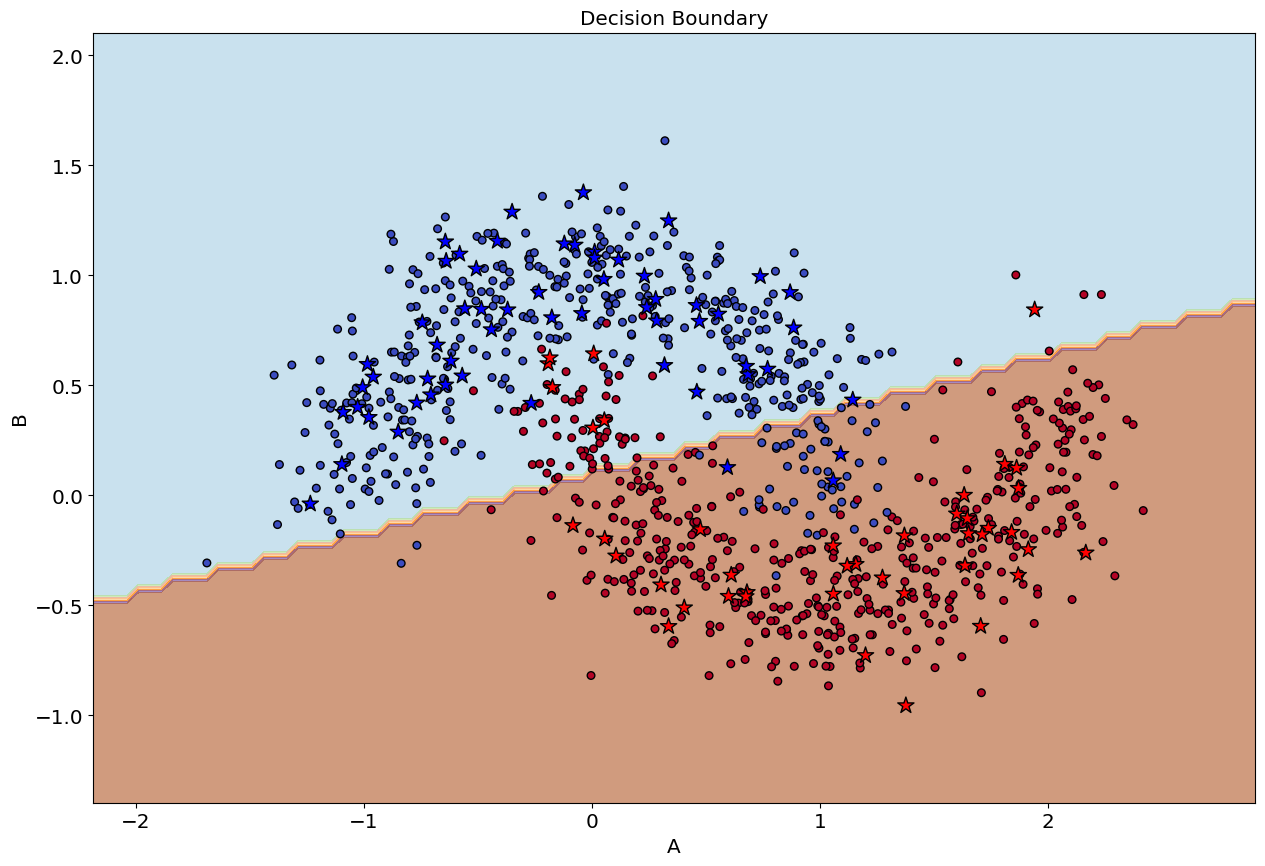

In [24]:
fn_plot_decision_boundary(data_train, data_test)

## Notes:
<img src="images/dnn_nb_s03_fig1.png" width='350' align = 'left'>
<img src="images/dnn_nb_s03_fig2.png" width='550' align = 'right'>

Introducing $\mathrm{sigmoid}$ function for our binary output.
$$
\begin{aligned}
z & = x_1 . w_1 + x_2 . w_2 + b_1 \\
a & = \hat{y} = \sigma(z)\\
dz & = (a - y) \\
db & = dz\\
b & = b - \alpha . db\\
dw_1 & = x_1. dz\\
dw_2 & = x_2.dz\\
w_1 & = w_1 - \alpha . dw_1\\
w_2 & = w_1 - \alpha . dw_2\\
\end{aligned}
$$
### Sigmoid function
$$
\begin{align}
a &= \sigma(z)\\
&= \dfrac{1}{1 + e^{-z}}\\
\end{align}
$$
    <h3>Derivative of sigmoid function</h3>
$$
\begin{align}
\partial{a} &= \partial{(\sigma(z))}\\
&= \dfrac{\partial}{\partial{z}} \left[ \dfrac{1}{1 + e^{-z}} \right] \\
&= \dfrac{\partial}{\partial{z}} \left( 1 + \mathrm{e}^{-z} \right)^{-1} \\
&= -(1 + e^{-z})^{-2}(-e^{-z}) \\
&= \dfrac{e^{-z}}{\left(1 + e^{-z}\right)^2} \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \dfrac{e^{-z}}{1 + e^{-z}}  \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \dfrac{(1 + e^{-z}) - 1}{1 + e^{-z}}  \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \left[ \dfrac{1 + e^{-z}}{1 + e^{-z}} - \dfrac{1}{1 + e^{-z}} \right] \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \left[ 1 - \dfrac{1}{1 + e^{-z}} \right] \\
&= \sigma(z) \circ (1 - \sigma(z))\\
&= a \circ (1 - a)
\end{align}
$$
    </div>

## A note on Loss Function
In logistic regression we are looking for if it is correct class or not. For example, we want to know if there is a car in the picture or not.
    
Mathematically speaking:

$\hat{y} = p(y=1|x)$ i.e. given training sample $x$, we want to know probability of $y$ being 1.<br>

Alternatively:

If there is a car in the picture.  $\Rightarrow$  $y$ = 1 then $p(y|x)$ = $\hat{y}$.  

if there is **no** car in the picture.$\Rightarrow$ $y$ = 0 then $p(y|x)$ = 1 - $\hat{y}$.  

We can summarize two equation as:

$p(y|x)$ = $\hat{y}^{y} * (1 - \hat{y}) ^{(1-y)}$

Above equation is $\hat{y}$ for y = 1 and (1 - $\hat{y}$) for y = 0.

Taking log of above equation:

$
\begin{aligned}
log [ p(y|x) ] & = log[\hat{y}^{y} * (1 - \hat{y}) ^{(1-y)}]\\
& = y * log(\hat{y}) + (1-y) * log(1 - \hat{y})\\
\end{aligned}
$

Since we aim to minimize above function, add negative sign and our loss function becomes

$
\begin{aligned}
L(\hat{y},y) =  -[y * log\hat{y} + (1-y) * log(1-\hat{y})]\\
\text{or}\\
L(a,y) =  - [ y * log ( a ) + ( 1 - y ) * log( 1 - a ) ]\\
\end{aligned}
$

|Case| y |Loss| a |-log(a)|-log(1-a)|
|:-: |:-:|:-: |:-:|  :-: |   :-:  |
| 1  | 0 | -log( 1 - a )| 0.000001 |13.8155|**1 e-6**|
| 2  | 0 | -log( 1 - a )| 0.999999 |1 e-6|**13.8155**|
| 3  | 1 | -log( a )| 0.000001 |**13.8155**|1 e-6|
| 4  | 1 | -log( a )| 0.999999 |**1 e-6**|13.8155|

Thus for binary classification the error = - $y * np.log(a)$

We want to sum it up for all samples in the dataset. Hence:

$
\begin{aligned}
p(\text{all ys | all rows of x}) & =  \Pi_{i=0}^m p(y|x)\\
log [ p(\text{all ys | all rows of x})] & =  log [ \Pi_{i=0}^m p(y|x) ]\\
& =  \sum_{i=0}^m log [ p(y|x) ] \\
& =  \sum_{i=0}^m [ y * log(\hat{y}) + (1-y) * log(1 - \hat{y}) ]\\
\text{Divide it by m to better scale the costs}\\
& = \frac{1}{m} * \sum_{i=0}^m [ y * log(\hat{y}) + (1-y) * log(1 - \hat{y}) ]\\
\end{aligned}
$